In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [9]:
# Training dataset (X) and expected output (R)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

R = np.array([
    [0, 0],
    [1, 0],
    [1, 0],
    [0, 1]
])


In [10]:
# Set seed for reproducibility
np.random.seed(42)

# Initialize weights and biases for S2222 structure
W1 = np.random.uniform(-1, 1, (2, 2))  # Input to Hidden1
b1 = np.zeros((1, 2))

W2 = np.random.uniform(-1, 1, (2, 2))  # Hidden1 to Hidden2
b2 = np.zeros((1, 2))

W3 = np.random.uniform(-1, 1, (2, 2))  # Hidden2 to Output
b3 = np.zeros((1, 2))


In [11]:
# Hyperparameters
learning_rate = 0.5
epochs = 10000
errors = []


In [12]:
for epoch in range(epochs):
    # -------- Forward Propagation --------
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)  # Final output

    # -------- Error Calculation --------
    error = R - A3
    total_error = np.mean(np.square(error))
    errors.append(total_error)

    # -------- Backward Propagation --------
    dA3 = error * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dA3)
    db3 = np.sum(dA3, axis=0, keepdims=True)

    dA2 = np.dot(dA3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # -------- Update weights and biases --------
    W3 += learning_rate * dW3
    b3 += learning_rate * db3
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1


In [13]:
# Final Predictions
print("Final Output Predictions:")
predictions = np.round(A3, 3)
for i in range(len(X)):
    print(f"Input: {X[i]} → Predicted: {predictions[i]} | Expected: {R[i]}")


Final Output Predictions:
Input: [0 0] → Predicted: [0.016 0.   ] | Expected: [0 0]
Input: [0 1] → Predicted: [0.982 0.013] | Expected: [1 0]
Input: [1 0] → Predicted: [0.982 0.013] | Expected: [1 0]
Input: [1 1] → Predicted: [0.016 0.985] | Expected: [0 1]


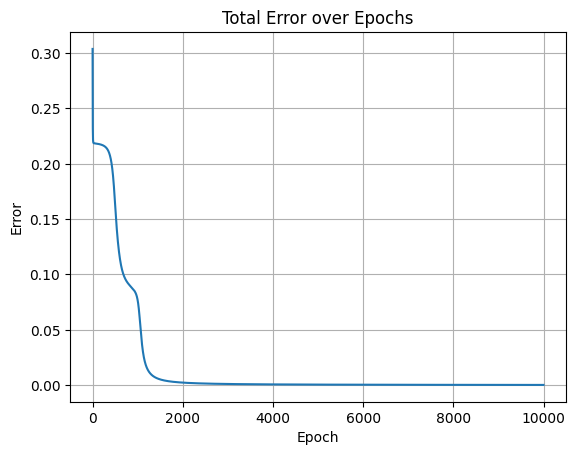

In [14]:
# Plot total error over training
plt.plot(errors)
plt.title("Total Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()
